In [1]:
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

In [2]:
# OBS
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_2008-2021_except_2016_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [3]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso_nan_r144x90.nc"
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [4]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [5]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lat_id = (lat <= -60) 
lat = lat[lat_id]

lon_est = lon[lon<=150]
lon_peninsule = lon[(lon> 280) & (lon<=305)]
lon_ouest = lon[(lon>150) & (lon<=170) | (lon>210)&(lon<=280) | (lon>340) &(lon<=360)]
lon_ice_shelves = lon[(lon>170) & (lon <=210) | (lon>305) & (lon <=340)]

# print('Lon est :', lon_est)
# print('Lon péninsule :', lon_peninsule)
# print('Lon ouest :', lon_ouest)
# print('Lon ice shelves :', lon_ice_shelves)

lon_est_id = lon<=150
lon_peninsule_id = (lon> 280) & (lon<=305)
lon_ouest_id = (lon>150) & (lon<=170) | (lon>210)&(lon<=280) | (lon>340) &(lon<=360)
lon_ice_shelves_id = (lon>170) & (lon <=210) | (lon>305) & (lon <=340)

# print('Lon est id :', lon_est_id)
# print('Lon péninsule id :', lon_peninsule_id)
# print('Lon ouest id :', lon_ouest_id)
# print('Lon ice shelves id :', lon_ice_shelves_id)

alt_mid = nc_alt_mid.variables['alt_mid'][:] #levels

In [6]:
# ALTITUDE
g = 9.81 # m/s
alt_est_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_est_id]/g,axis=(0,2)) #m
alt_peninsule_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_peninsule_id]/g,axis=(0,2)) #m
alt_ouest_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_ouest_id]/g,axis=(0,2)) #m
alt_ice_shelves_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_ice_shelves_id]/g,axis=(0,2)) #m

alt_data = np.dstack((alt_est_mean,alt_peninsule_mean,alt_ouest_mean,alt_ice_shelves_mean))

In [7]:
# LONGITUDINAL MEAN

# VARIABLES - OBS
clobs_est_mean = np.mean(nc_obs.variables['clcalipso'][0,:,lat_id,lon_est_id], axis=2)
clobs_peninsule_mean = np.mean(nc_obs.variables['clcalipso'][0,:,lat_id,lon_peninsule_id], axis=2)
clobs_ouest_mean = np.mean(nc_obs.variables['clcalipso'][0,:,lat_id,lon_ouest_id], axis=2)
clobs_ice_shelves_mean = np.mean(nc_obs.variables['clcalipso'][0,:,lat_id,lon_ice_shelves_id], axis=2)

# VARIABLES - LMDZ6A
cllmdz6a_est_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_est_id], axis=(0,3))
cllmdz6a_peninsule_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_peninsule_id], axis=(0,3))
cllmdz6a_ouest_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_ouest_id], axis=(0,3))
cllmdz6a_ice_shelves_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_ice_shelves_id], axis=(0,3))

cl_data = np.ma.dstack((clobs_est_mean,clobs_peninsule_mean,clobs_ouest_mean,clobs_ice_shelves_mean,cllmdz6a_est_mean,cllmdz6a_peninsule_mean,cllmdz6a_ouest_mean,cllmdz6a_ice_shelves_mean))
diff_data = np.ma.dstack((cllmdz6a_est_mean-clobs_est_mean,cllmdz6a_peninsule_mean-clobs_peninsule_mean,cllmdz6a_ouest_mean-clobs_ouest_mean,cllmdz6a_ice_shelves_mean-clobs_ice_shelves_mean))

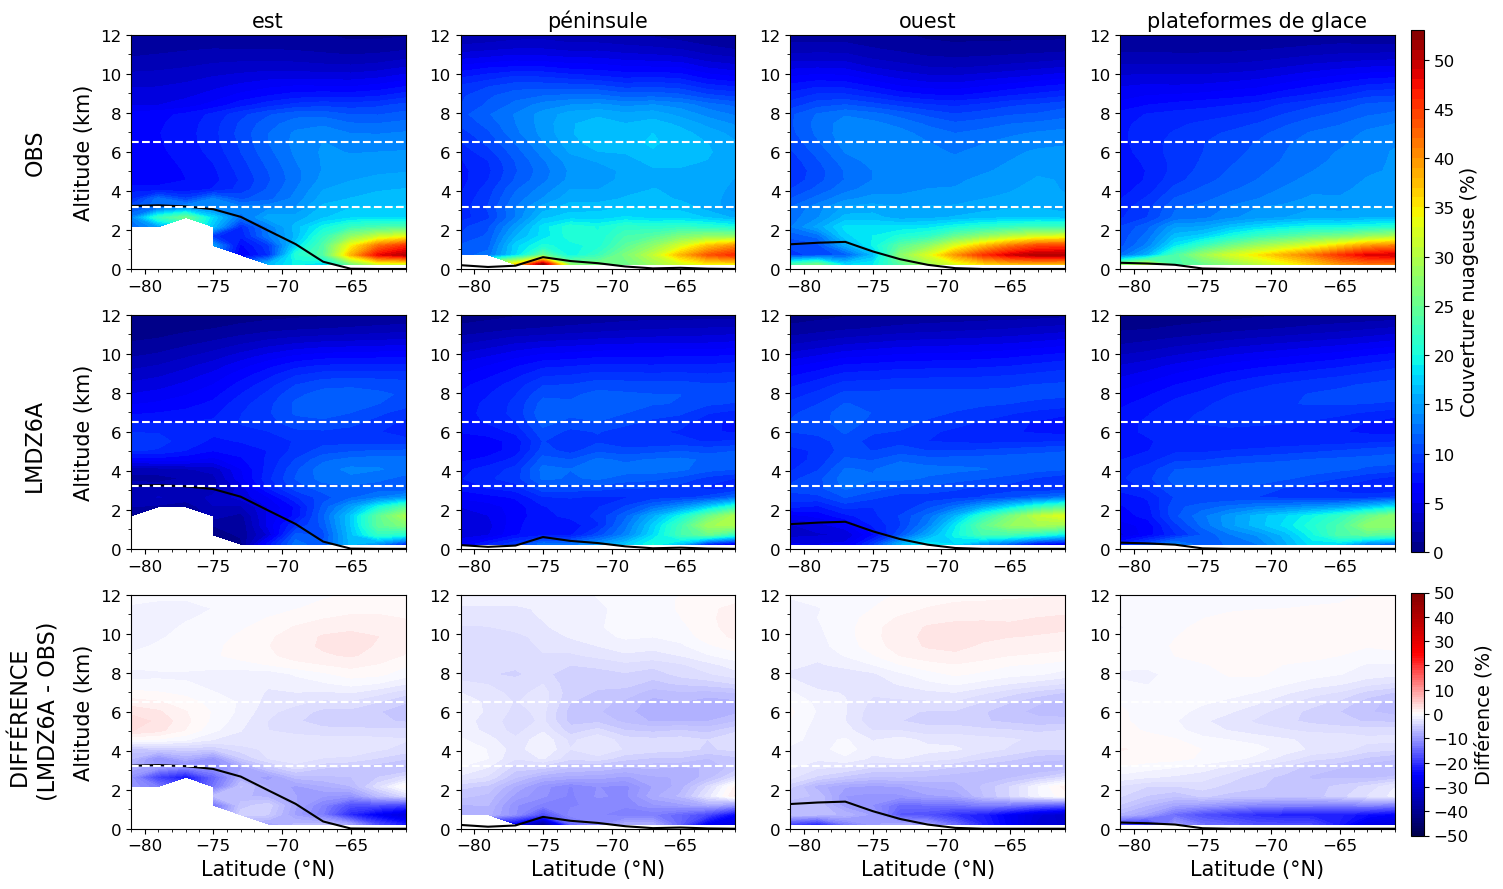

In [8]:
fig, axes = plt.subplots(figsize=(16,9), nrows=3, ncols=4)
pltcounter = 0 ; altcounter = 0 ; counter=0

fig.text(0.04, 0.825, 'OBS', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.5, 'LMDZ6A', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.2, 'DIFFÉRENCE \n (LMDZ6A - OBS)', fontsize=16, va='center', ha='center', rotation='vertical')

for plotid in axes.flat:
    pltcounter = pltcounter + 1
    altcounter = (pltcounter - 1) % 4 + 1
        
    if pltcounter >= 9 :
        counter = counter+1
        clplot = diff_data[:,:,counter-1]*100
        clevs2 = np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])*100
        clevs2 = np.arange(-50,51,1)
        cmap='seismic'
        cs2 = plotid.contourf(lat, alt_mid, clplot, clevs2, cmap=cmap)

    else :
        clplot = cl_data[:,:,pltcounter-1]*100
        clevs1 = np.array([0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15,16.5,18,19.5,21,22.5,24,25.5,27,28.5,30,31.5,33,34.5,36,37.5,39,40.5,42,43.5,45,46.5,48,49.5,50.5])
        clevs1 = np.arange(0,54,1)
        cmap='jet'
        cs1 = plotid.contourf(lat, alt_mid, clplot, clevs1, cmap=cmap)
        
    altplot = alt_data[0,:,altcounter-1]
    plotid.plot(lat, altplot*1e-3, c='k')
    plotid.set_ylim(0,12)
    plotid.set_xlim(-81,-61)
    #plotid.contour(lat, alt_mid, clplot, levels=[10], colors='w')
    #plotid.contour(lat, alt_mid, clplot, levels=[5], linestyles=':', colors='w')
    plotid.tick_params(axis='both', labelsize=12)
    plotid.axhline(3.2, c='w',linestyle='--')
    plotid.axhline(6.5, c='w',linestyle='--')
        
    if pltcounter == 1 : 
        plotid.set_title('est', size=15)
    if pltcounter == 2 : 
        plotid.set_title('péninsule', size=15)
    if pltcounter == 3 : 
        plotid.set_title('ouest', size=15)
    if pltcounter == 4 : 
        plotid.set_title('plateformes de glace', size=15)
    if pltcounter in [9,10,11,12] :
        plotid.set_xlabel('Latitude (°N)', size=15)
    if pltcounter in [1,5,9]: 
        plotid.set_ylabel('Altitude (km)', size=15)

    plotid.xaxis.set_major_locator(MultipleLocator(5))
    plotid.xaxis.set_minor_locator(MultipleLocator(1))
    plotid.yaxis.set_major_locator(MultipleLocator(2))
    plotid.yaxis.set_minor_locator(MultipleLocator(1))

#fig.suptitle('GOCCP (2007-2021, not 2016) & LMDZ6A (1980-1999) climatology', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(right=0.89, left=0.1, wspace=0.2)
cbar_ax = fig.add_axes([0.9, 0.38, 0.008, 0.58])
cbar_ax2 = fig.add_axes([0.9, 0.065, 0.008, 0.27])
cb1 = fig.colorbar(cs1, cax=cbar_ax, ticks=np.arange(0,51,5), label='Cloud fraction (%)')
cb2 = fig.colorbar(cs2, cax=cbar_ax2, ticks=np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])*100, label='Cloud fraction difference (%)')
cb1.ax.tick_params(labelsize=12)
cb2.ax.tick_params(labelsize=12)
cb1.set_label('Couverture nuageuse (%)', fontsize=14)
cb2.set_label('Différence (%)', fontsize=14)
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/3DCloudFraction/sections/climato/'
fig.savefig(path_fig+'3DCloudFraction_climato_obs_lmdz6a_diff.png',dpi=300)

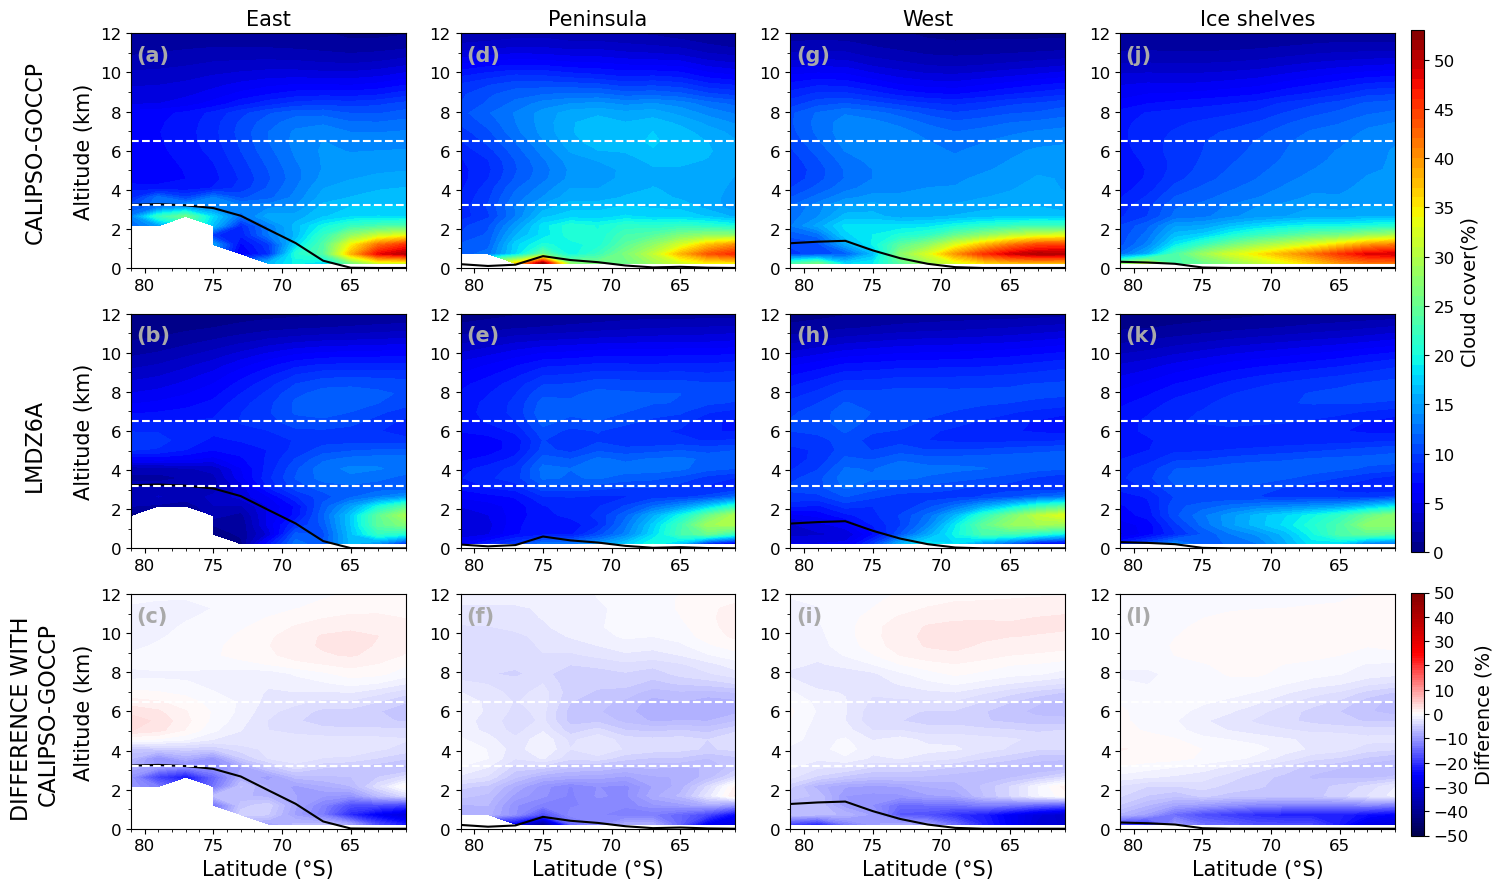

In [9]:
fig, axes = plt.subplots(figsize=(16,9), nrows=3, ncols=4)
pltcounter = 0 ; altcounter = 0 ; counter=0

fig.text(0.04, 0.825, 'CALIPSO-GOCCP', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.5, 'LMDZ6A', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.2, 'DIFFERENCE WITH \nCALIPSO-GOCCP', fontsize=16, va='center', ha='center', rotation='vertical')

alphabet = 'adgjbehkcfil'
lat_positive = -lat
for idx, plotid in enumerate(axes.flat):
    pltcounter = pltcounter + 1
    altcounter = (pltcounter - 1) % 4 + 1
        
    if pltcounter >= 9 :
        counter = counter+1
        clplot = diff_data[:,:,counter-1]*100
        clevs2 = np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])*100
        clevs2 = np.arange(-50,51,1)
        cmap='seismic'
        cs2 = plotid.contourf(lat_positive, alt_mid, clplot, clevs2, cmap=cmap)

    else :
        clplot = cl_data[:,:,pltcounter-1]*100
        clevs1 = np.array([0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15,16.5,18,19.5,21,22.5,24,25.5,27,28.5,30,31.5,33,34.5,36,37.5,39,40.5,42,43.5,45,46.5,48,49.5,50.5])
        clevs1 = np.arange(0,54,1)
        cmap='jet'
        cs1 = plotid.contourf(lat_positive, alt_mid, clplot, clevs1, cmap=cmap)
        
    altplot = alt_data[0,:,altcounter-1]
    plotid.plot(lat_positive, altplot*1e-3, c='k')
    plotid.set_ylim(0,12)
    plotid.set_xlim(81,61)
    #plotid.contour(lat, alt_mid, clplot, levels=[10], colors='w')
    #plotid.contour(lat, alt_mid, clplot, levels=[5], linestyles=':', colors='w')
    plotid.tick_params(axis='both', labelsize=12)
    plotid.axhline(3.2, c='w',linestyle='--')
    plotid.axhline(6.5, c='w',linestyle='--')
        
    if pltcounter == 1 : 
        plotid.set_title('East', size=15)
    if pltcounter == 2 : 
        plotid.set_title('Peninsula', size=15)
    if pltcounter == 3 : 
        plotid.set_title('West', size=15)
    if pltcounter == 4 : 
        plotid.set_title('Ice shelves', size=15)
    if pltcounter in [9,10,11,12] :
        plotid.set_xlabel('Latitude (°S)', size=15)
    if pltcounter in [1,5,9]: 
        plotid.set_ylabel('Altitude (km)', size=15)

    plotid.xaxis.set_major_locator(MultipleLocator(5))
    plotid.xaxis.set_minor_locator(MultipleLocator(1))
    plotid.yaxis.set_major_locator(MultipleLocator(2))
    plotid.yaxis.set_minor_locator(MultipleLocator(1))

    plotid.annotate(f'({alphabet[idx]})', xy=(0.02, 0.95), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='left', va='top')

    
#fig.suptitle('GOCCP (2007-2021, not 2016) & LMDZ6A (1980-1999) climatology', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(right=0.89, left=0.1, wspace=0.2)

#line = plt.Line2D([0.07, 0.9], [1.05/3, 1.05/3], color='black', linestyle='--', linewidth=2, transform=fig.transFigure)
#fig.add_artist(line)

cbar_ax = fig.add_axes([0.9, 0.38, 0.008, 0.58])
cbar_ax2 = fig.add_axes([0.9, 0.065, 0.008, 0.27])
cb1 = fig.colorbar(cs1, cax=cbar_ax, ticks=np.arange(0,51,5), label='Cloud fraction (%)')
cb2 = fig.colorbar(cs2, cax=cbar_ax2, ticks=np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])*100, label='Cloud fraction difference (%)')
cb1.ax.tick_params(labelsize=12)
cb2.ax.tick_params(labelsize=12)
cb1.set_label('Cloud cover(%)', fontsize=14)
cb2.set_label('Difference (%)', fontsize=14)
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/3DCloudFraction/sections/climato/'
fig.savefig(path_fig+'3DCloudFraction_climato_obs_lmdz6a_diff_EN.png',dpi=300)

In [149]:
cl_data = np.ma.dstack((clobs_est_mean,cllmdz6a_est_mean,cllmdz6a_est_mean-clobs_est_mean,
                        clobs_peninsule_mean,cllmdz6a_peninsule_mean,cllmdz6a_peninsule_mean-clobs_peninsule_mean,
                        clobs_ouest_mean,cllmdz6a_ouest_mean,cllmdz6a_ouest_mean-clobs_ouest_mean,
                        clobs_ice_shelves_mean,cllmdz6a_ice_shelves_mean,cllmdz6a_ice_shelves_mean-clobs_ice_shelves_mean))

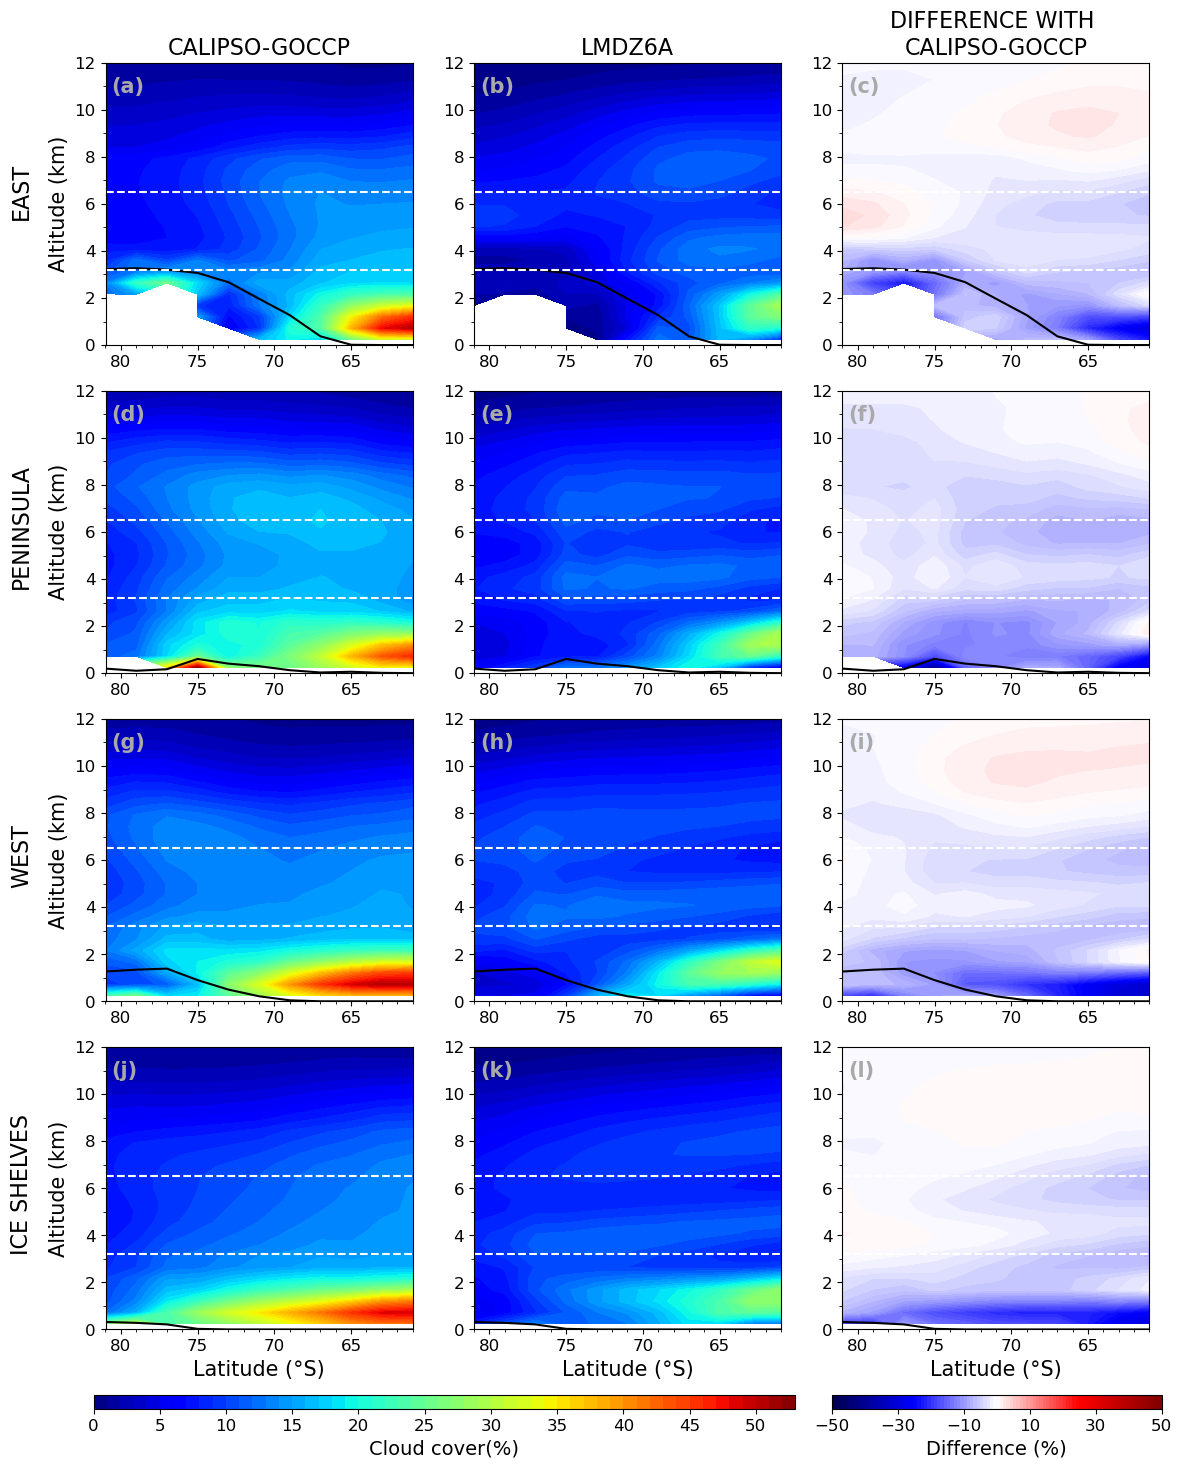

In [151]:
fig, axes = plt.subplots(figsize=(12,14), nrows=4, ncols=3)
pltcounter = 0 ; altcounter_seq = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

fig.text(0.05, 0.86, 'EAST', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.05, 0.62, 'PENINSULA', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.05, 0.385, 'WEST', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.05, 0.15, 'ICE SHELVES', fontsize=16, va='center', ha='center', rotation='vertical')

alphabet = 'abcdefghijklmnopqrstuvwxyz'
lat_positive = -lat
for idx, plotid in enumerate(axes.flat):
    pltcounter = pltcounter + 1
    altcounter = altcounter_seq[idx]

    clplot = cl_data[:,:,pltcounter-1]*100
    
    if pltcounter in [3,6,9,12] :
        clevs2 = np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])*100
        clevs2 = np.arange(-50,51,1)
        cmap='seismic'
        cs2 = plotid.contourf(lat_positive, alt_mid, clplot, clevs2, cmap=cmap)

    else :
        clevs1 = np.array([0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15,16.5,18,19.5,21,22.5,24,25.5,27,28.5,30,31.5,33,34.5,36,37.5,39,40.5,42,43.5,45,46.5,48,49.5,50.5])
        clevs1 = np.arange(0,54,1)
        cmap='jet'
        cs1 = plotid.contourf(lat_positive, alt_mid, clplot, clevs1, cmap=cmap)
        
    altplot = alt_data[0,:,altcounter-1]
    plotid.plot(lat_positive, altplot*1e-3, c='k')
    plotid.set_ylim(0,12)
    plotid.set_xlim(81,61)
    #plotid.contour(lat, alt_mid, clplot, levels=[10], colors='w')
    #plotid.contour(lat, alt_mid, clplot, levels=[5], linestyles=':', colors='w')
    plotid.tick_params(axis='both', labelsize=12)
    plotid.axhline(3.2, c='w',linestyle='--')
    plotid.axhline(6.5, c='w',linestyle='--')
        
    if pltcounter == 1 : 
        plotid.set_title('CALIPSO-GOCCP', size=16)
    if pltcounter == 2 : 
        plotid.set_title('LMDZ6A', size=16)
    if pltcounter == 3 : 
        plotid.set_title('DIFFERENCE WITH \nCALIPSO-GOCCP', size=16)
        
    if pltcounter in [10,11,12] :
        plotid.set_xlabel('Latitude (°S)', size=15)
    if pltcounter in [1,4,7,10]: 
        plotid.set_ylabel('Altitude (km)', size=15)

    plotid.xaxis.set_major_locator(MultipleLocator(5))
    plotid.xaxis.set_minor_locator(MultipleLocator(1))
    plotid.yaxis.set_major_locator(MultipleLocator(2))
    plotid.yaxis.set_minor_locator(MultipleLocator(1))

    plotid.annotate(f'({alphabet[idx]})', xy=(0.02, 0.95), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='left', va='top')

    
#fig.suptitle('GOCCP (2007-2021, not 2016) & LMDZ6A (1980-1999) climatology', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(right=0.99, left=0.12, wspace=0.2)

#line = plt.Line2D([0.07, 0.9], [1.05/3, 1.05/3], color='black', linestyle='--', linewidth=2, transform=fig.transFigure)
#fig.add_artist(line)

cbar_ax = fig.add_axes([0.11, -0.01, 0.585, 0.01])
cbar_ax2 = fig.add_axes([0.725, -0.01, 0.275, 0.01])
cb1 = fig.colorbar(cs1, cax=cbar_ax, ticks=np.arange(0,51,5), label='Cloud fraction (%)', orientation='horizontal')
cb2 = fig.colorbar(cs2, cax=cbar_ax2, ticks=np.arange(-50,51,20), label='Cloud fraction difference (%)', orientation='horizontal')
cb1.ax.tick_params(labelsize=12)
cb2.ax.tick_params(labelsize=12)
cb1.set_label('Cloud cover(%)', fontsize=14)
cb2.set_label('Difference (%)', fontsize=14)

path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/3DCloudFraction/sections/climato/'
fig.savefig(path_fig+'3DCloudFraction_climato_obs_lmdz6a_diff_EN_reversed.png',dpi=300, bbox_inches='tight')